In [1]:
# load the amount of annotated data from the metadata csv
import pandas as pd
import os

annotations_csv_path = '/home/etaylor/code_projects/thesis/data/metadata/annotations_tracking.csv'
annotations_track = pd.read_csv(annotations_csv_path)

annotations_track.head()

,image_number,annotator,Time,done
0,IMG_2198,dorins,15-12-2023_19-26-10,True
1,IMG_2153,dorins,15-12-2023_19-26-10,True
2,IMG_2305,Nirmalka,15-12-2023_19-26-10,True
3,IMG_2145,Nirmalka,15-12-2023_19-26-10,True
4,IMG_2129,Nirmalka,15-12-2023_19-26-10,True


In [2]:
# filter all annotations that are already annotated
done_annotations = annotations_track[annotations_track['done'] == 1]

# get the amount of done annotations
done_annotations_count = done_annotations.shape[0]
print(f"Amount of done annotations: {done_annotations_count}")

Amount of done annotations: 82


In [3]:
import config

# get the amount of each week
images_details = {}

# iterate over all the image numbers (the image_number columns in done_annotations_count)
for image_number in done_annotations['image_number']:
    # get the week number of the image
    week_number, _ = config.find_image_details(image_number)
    
    # save the week number in the images_details dict
    images_details[image_number] = week_number


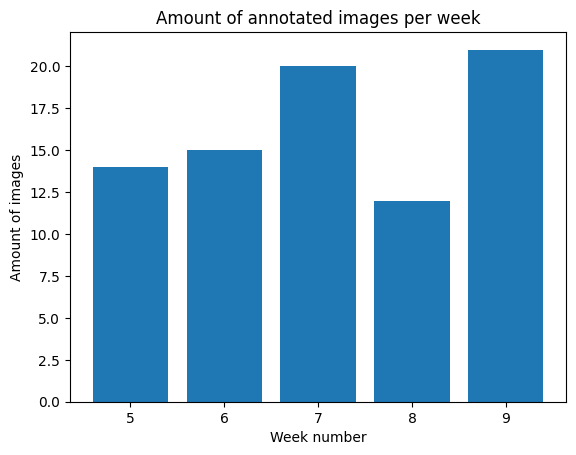

In [4]:
# plot the dist of annotated imags
import matplotlib.pyplot as plt
import numpy as np

# use the images_details dict to get the week number of each image
week_numbers = list(images_details.values())# plot the dist of annotated imags
import matplotlib.pyplot as plt
import numpy as np

# use the images_details dict to get the week number of each image
week_numbers = list(images_details.values())
import re

# get only the first value on the week name after the underscore
week_numbers = [week.split('_')[0] for week in week_numbers]

# extract only the numeric part of the week string
week_numbers = [int(re.search(r'\d+', week).group()) for week in week_numbers]

# get the unique week numbers
unique_week_numbers = np.unique(week_numbers)

# get the amount of images per week
images_per_week = [week_numbers.count(week) for week in unique_week_numbers]

# plot the amount of images per week
plt.bar(unique_week_numbers, images_per_week)
plt.xlabel('Week number')
plt.ylabel('Amount of images')
plt.title('Amount of annotated images per week')
plt.show()

In [9]:
import os
import glob

# Define the base path
base_path = "/home/etaylor/images/processed_images/cannabis_patches"

# Initialize a dictionary to store the count of patches per week
patches_count_per_week = {}
patches_per_week = {}

# Get a list of all week directories in the base path
week_dirs = glob.glob(os.path.join(base_path, "week*"))

for week_dir in week_dirs:
    # Extract the week number from the directory name
    week_number = os.path.basename(week_dir).split('_')[0]
    
    # Initialize the count for the current week
    patches_count_per_week[week_number] = 0
    patches_per_week[week_number] = []
    
    # Get a list of all image directories in the current week directory
    image_dirs = glob.glob(os.path.join(week_dir, "*", "*"))
    
    for image_dir in image_dirs:
        # Extract the image number from the directory name
    
        image_number = os.path.basename(image_dir)
        # Check if the image is in the done_annotations_count DataFrame
        if image_number in done_annotations['image_number'].values:
            # Count the number of patch files in the current image directory
            patch_files = glob.glob(os.path.join(image_dir, "*"))
            patch_count = len(patch_files)
            patches_per_week[week_number].extend([os.path.basename(patch) for patch in patch_files])
            
            # Add the count of patches to the total for the current week
            patches_count_per_week[week_number] += patch_count

# Print the count of patches per week
for week, count in patches_count_per_week.items():
    print(f"Week: {week}, Patch count: {count}")

# Calculate and print the total count of patches
total_patches_count = sum(patches_count_per_week.values())
print(f"Total patch count: {total_patches_count}")

Week: week9, Patch count: 241
Week: week5, Patch count: 146
Week: week6, Patch count: 177
Week: week7, Patch count: 225
Week: week8, Patch count: 137
Total patch count: 926


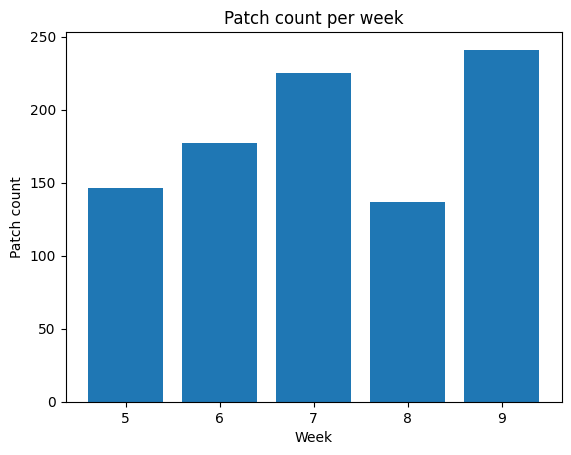

In [6]:
import matplotlib.pyplot as plt

# Get the weeks and counts from the dictionary
weeks = list(patches_count_per_week.keys())
counts = list(patches_count_per_week.values())

# take only the number from the week name
week_numbers = [int(re.search(r'\d+', week).group()) for week in weeks]
# Create a bar plot
plt.bar(week_numbers, counts)

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Patch count')
plt.title('Patch count per week')

# Display the plot
plt.show()

In [10]:
# Print the patch file names per week
for week, patches in patches_per_week.items():
    print(f"Week: {week}, Patches: {patches}")

# Calculate and print the total count of patches
total_patches_count = sum(len(patches) for patches in patches_per_week.values())
print(f"Total patch count: {total_patches_count}")

Week: week9, Patches: ['IMG_2129_p0.png', 'IMG_2129_p1.png', 'IMG_2129_p2.png', 'IMG_2129_p3.png', 'IMG_2129_p4.png', 'IMG_2129_p5.png', 'IMG_2129_p6.png', 'IMG_2129_p7.png', 'IMG_2129_p8.png', 'IMG_2129_p9.png', 'IMG_2129_p10.png', 'IMG_2140_p0.png', 'IMG_2140_p1.png', 'IMG_2140_p2.png', 'IMG_2140_p3.png', 'IMG_2140_p4.png', 'IMG_2140_p5.png', 'IMG_2140_p6.png', 'IMG_2140_p7.png', 'IMG_2140_p8.png', 'IMG_2140_p9.png', 'IMG_2140_p10.png', 'IMG_2140_p11.png', 'IMG_2145_p0.png', 'IMG_2145_p1.png', 'IMG_2145_p2.png', 'IMG_2145_p3.png', 'IMG_2145_p4.png', 'IMG_2145_p5.png', 'IMG_2145_p6.png', 'IMG_2145_p7.png', 'IMG_2145_p8.png', 'IMG_2145_p9.png', 'IMG_2145_p10.png', 'IMG_2145_p11.png', 'IMG_2145_p12.png', 'IMG_2145_p13.png', 'IMG_2235_p0.png', 'IMG_2235_p1.png', 'IMG_2235_p2.png', 'IMG_2235_p3.png', 'IMG_2235_p4.png', 'IMG_2235_p5.png', 'IMG_2235_p6.png', 'IMG_2235_p7.png', 'IMG_2276_p0.png', 'IMG_2276_p1.png', 'IMG_2276_p2.png', 'IMG_2276_p3.png', 'IMG_2276_p4.png', 'IMG_2276_p5.png', '

In [15]:
images_details

{'IMG_2198': 'week9_15_06_2023',
 'IMG_2153': 'week9_15_06_2023',
 'IMG_2305': 'week9_15_06_2023',
 'IMG_2145': 'week9_15_06_2023',
 'IMG_2129': 'week9_15_06_2023',
 'IMG_1875': 'week8_07_06_2023',
 'IMG_1787': 'week8_07_06_2023',
 'IMG_1857': 'week8_07_06_2023',
 'IMG_1753': 'week8_07_06_2023',
 'IMG_1777': 'week8_07_06_2023',
 'IMG_1818': 'week8_07_06_2023',
 'IMG_0014': 'week5_18_05_2023',
 'IMG_0003': 'week5_18_05_2023',
 'IMG_0002': 'week5_18_05_2023',
 'IMG_0001': 'week5_18_05_2023',
 'IMG_1093': 'week7_01_06_2023',
 'IMG_1086': 'week7_01_06_2023',
 'IMG_1085': 'week7_01_06_2023',
 'IMG_1079': 'week7_01_06_2023',
 'IMG_1082': 'week7_01_06_2023',
 'IMG_1084': 'week7_01_06_2023',
 'IMG_0016': 'week5_18_05_2023',
 'IMG_0017': 'week5_18_05_2023',
 'IMG_0540': 'week6_22_05_2023',
 'IMG_0542': 'week6_22_05_2023',
 'IMG_0543': 'week6_22_05_2023',
 'IMG_0545': 'week6_22_05_2023',
 'IMG_0546': 'week6_22_05_2023',
 'IMG_0547': 'week6_22_05_2023',
 'IMG_2242': 'week9_15_06_2023',
 'IMG_2285

In [16]:
from src.annotation_handling.segmentsai_handler import SegmentsAIHandler

# Initialize the SegmentsAIHandler
segments_handler = SegmentsAIHandler()

# Initialize a dictionary to store the ground truth trichome distribution for each patch
ground_truth_trichome_distribution = {}

# Get the trichome distribution for each annotated image dataset
for image_number in done_annotations['image_number']:
    print(f"Get the distribution for patch {image_number}")
    trichome_distribution = segments_handler.get_trichome_distribution(image_number)
    ground_truth_trichome_distribution[image_number] = trichome_distribution
    print(f"Distribution for patch {image_number}: \n{trichome_distribution}")

Get the distribution for patch IMG_2198
Distribution for patch IMG_2198: 
{'clear': 48, 'cloudy': 148, 'amber': 10}
Get the distribution for patch IMG_2153
Distribution for patch IMG_2153: 
{'clear': 38, 'cloudy': 120, 'amber': 28}
Get the distribution for patch IMG_2305
Distribution for patch IMG_2305: 
{'clear': 46, 'cloudy': 96, 'amber': 32}
Get the distribution for patch IMG_2145
Distribution for patch IMG_2145: 
{'clear': 51, 'cloudy': 110, 'amber': 61}
Get the distribution for patch IMG_2129
Distribution for patch IMG_2129: 
{'clear': 75, 'cloudy': 216, 'amber': 9}
Get the distribution for patch IMG_1875
Distribution for patch IMG_1875: 
{'clear': 7, 'cloudy': 77, 'amber': 9}
Get the distribution for patch IMG_1787
Distribution for patch IMG_1787: 
{'clear': 3, 'cloudy': 104, 'amber': 60}
Get the distribution for patch IMG_1857
Distribution for patch IMG_1857: 
{'clear': 7, 'cloudy': 163, 'amber': 17}
Get the distribution for patch IMG_1753
Distribution for patch IMG_1753: 
{'cle

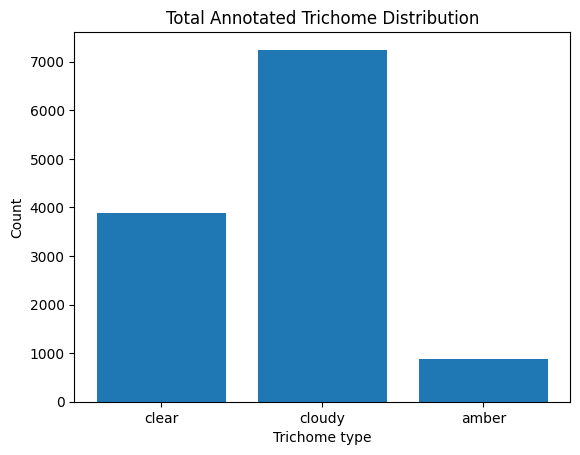

In [17]:
# plot the total ground truth distribution of trichomes
import numpy as np
import matplotlib.pyplot as plt

# Initialize a dictionary to store the total trichome distribution
total_trichome_distribution = {}

# Iterate over the ground truth trichome distributions
for trichome_distribution in ground_truth_trichome_distribution.values():
    # Iterate over the trichome distribution
    for trichome_type, count in trichome_distribution.items():
        # Add the count to the total trichome distribution
        if trichome_type not in total_trichome_distribution:
            total_trichome_distribution[trichome_type] = 0
        total_trichome_distribution[trichome_type] += count
        
# Get the trichome types and counts from the total trichome distribution
trichome_types = list(total_trichome_distribution.keys())
counts = list(total_trichome_distribution.values())


# Create a bar plot
plt.bar(trichome_types, counts)

# Add labels and title
plt.xlabel('Trichome type')
plt.ylabel('Count')
plt.title('Total Annotated Trichome Distribution')

# Display the plot
plt.show()



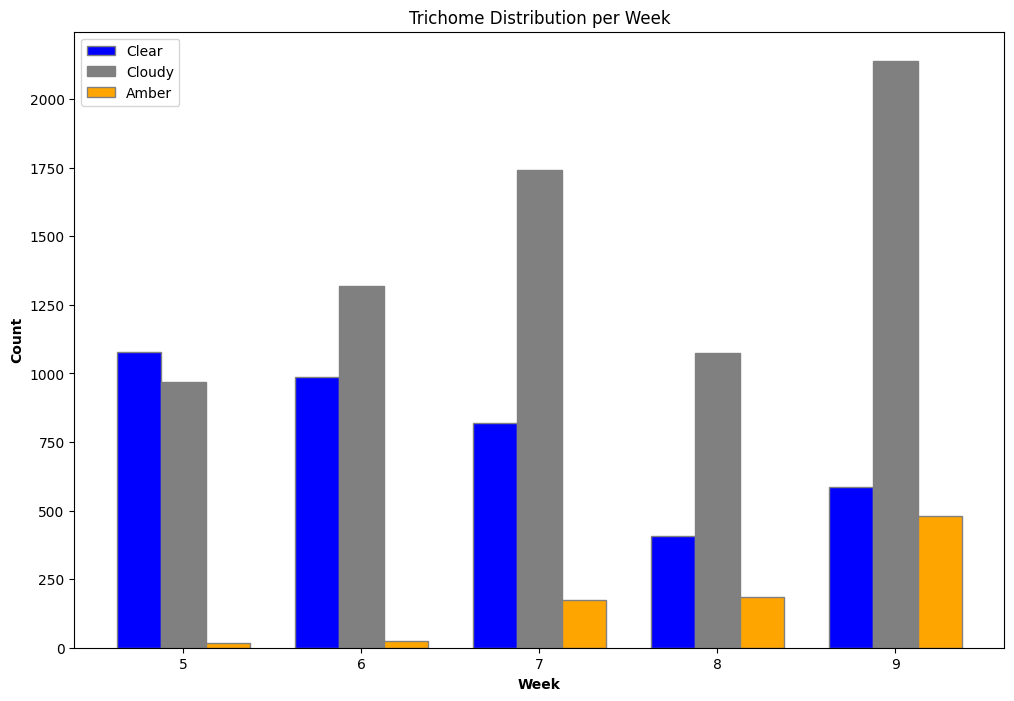

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import defaultdict

# Initialize a dictionary to store the aggregated trichome distribution per week
aggregated_distribution_per_week = defaultdict(lambda: {'clear': 0, 'cloudy': 0, 'amber': 0})

# Aggregate the distributions by week
for image_number, distribution in ground_truth_trichome_distribution.items():
    week = images_details.get(image_number)
    if week:
        for trichome_type, count in distribution.items():
            aggregated_distribution_per_week[week][trichome_type] += count

# Prepare data for plotting
weeks = list(aggregated_distribution_per_week.keys())
week_numbers = [int(re.search(r'\d+', week).group()) for week in weeks]

# Sort weeks and corresponding data
sorted_weeks, sorted_week_numbers = zip(*sorted(zip(weeks, week_numbers), key=lambda x: x[1]))

trichome_types = ['clear', 'cloudy', 'amber']
data = {trichome_type: [aggregated_distribution_per_week[week][trichome_type] for week in sorted_weeks] for trichome_type in trichome_types}

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(sorted_week_numbers))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bars
plt.figure(figsize=(12, 8))

plt.bar(r1, data['clear'], color='blue', width=bar_width, edgecolor='grey', label='Clear')
plt.bar(r2, data['cloudy'], color='gray', width=bar_width, edgecolor='grey', label='Cloudy')
plt.bar(r3, data['amber'], color='orange', width=bar_width, edgecolor='grey', label='Amber')

# Add labels
plt.xlabel('Week', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Trichome Distribution per Week')
plt.xticks([r + bar_width for r in range(len(sorted_week_numbers))], sorted_week_numbers)
plt.legend()

# Show the plot
plt.show()
